In [1]:
""" Starting  packages import (copy-paste) """
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import matplotlib.pylab as plt
import jetset
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED

# 1. Import data and shaping

## 1.1 Importing the SED data from the observation started at 56307 (MJD) or 15.01.2013

In [2]:
sed_data = ObsData(data_table=Data.from_file('sed_mrk421_mjd_56307.ecsv'))

## 1.2 Preliminary plot of the data and rebinning (standard) 


***  binning data  ***
---> N bins= 87
---> bin_widht= 0.2



/home/aramis/miniconda3/envs/jetset1.2/lib/python3.8/site-packages/astropy/table/table.py:1195: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  newcol = col[slice_]


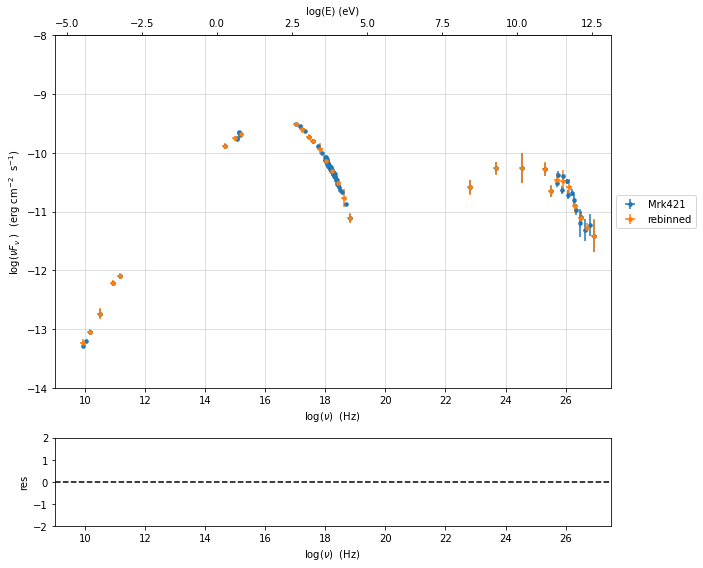

In [3]:
# Plot data
myPlot=sed_data.plot_sed()

# Data rebin in bins of 10^{0.2} [Hz]
sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.1,[10.**6,10.**29])

# Plotting rebinned data
myPlot.add_data_plot(sed_data,label='rebinned')

# Standard rescale that will be kept for the different pre-fits and fits
myPlot.rescale(y_min=-14,y_max=-8,x_min=9,x_max=27.5)

## 1.3 First shaping for different bands (expected power law, report section 2.2.2)


*** evaluating spectral indices for data ***


*** SEDShape values ***
---> spectral inidces values
---> name = radio            range=[5.400 ,10.600] log(Hz)  photon.val=-1.130429e+00, err=4.577293e-02 
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-9.095770e-01, err=5.610975e-02 
---> name = mm_IR            range=[10.500,13.500] log(Hz)  photon.val=-1.038280e+00, err=2.187269e-01 
---> name = IR_Opt           range=[13.000,14.000] log(Hz)  photon.val=No           , err=No           
---> name = Opt_UV           range=[14.000,16.000] log(Hz)  photon.val=-1.603844e+00, err=2.910393e-03 
---> name = BBB              range=[14.600,16.400] log(Hz)  photon.val=-1.603844e+00, err=2.910393e-03 
---> name = UV_X             range=[15.000,17.500] log(Hz)  photon.val=-1.990532e+00, err=6.519060e-02 
---> name = X                range=[16.000,19.000] log(Hz)  photon.val=-2.789932e+00, err=6.391834e-02 
---> name = Fermi            range=[22.380,25.380] log(Hz)  photon.

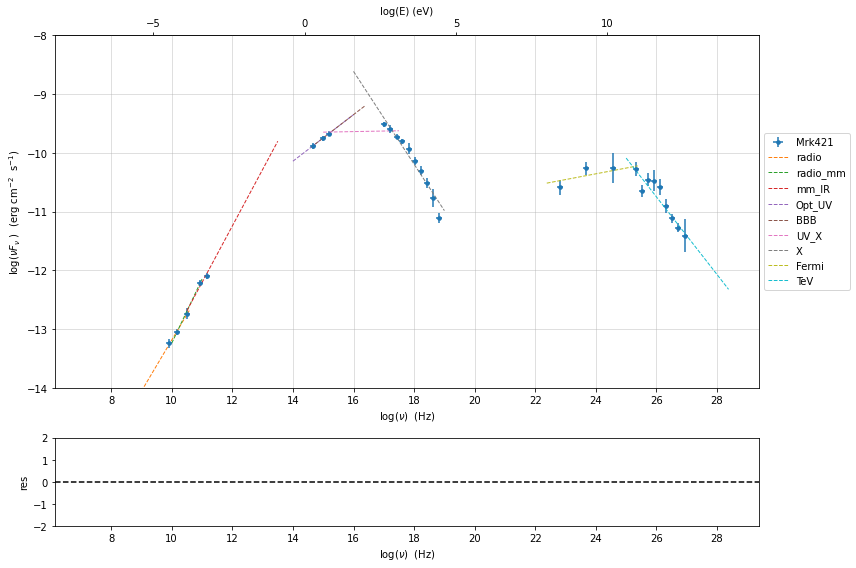

In [4]:
from jetset.sed_shaper import  SEDShape

# Selecting the SED data to shape
my_shape=SEDShape(sed_data)

# Indices evaluation
my_shape.eval_indices(silent=True)

# Plot the shaping
p=my_shape.plot_indices()

# Rescale with standard axis size
p.rescale(y_min=-14,y_max=-8)

# Show spectral indices
my_shape.show_values()

# 2. Separed fits and prefit

## 2.1 Fit with Synchrotron and Inverse Compton bumps (separated), without considering any galactic contribution to the flux. For further information about logparep, see:
### <i>E. Massaro, A. Tramacere et al., Log-parabolic spectra and particle acceleration in blazars, A&A 448, 861–871 (2006)<i>


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [9, 19.5]
---> class:  HSP





model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogParabolaEp,b,-1.090340e-01,-1.090340e-01,2.264851e-03,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogParabolaEp,Ep,1.585583e+01,1.585583e+01,4.042276e-02,--,1.612497e+01,0.000000e+00,3.000000e+01,False
LogParabolaEp,Sp,-9.577266e+00,-9.577266e+00,2.061977e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


---> sync       nu_p=+1.585583e+01 (err=+4.042276e-02)  nuFnu_p=-9.577266e+00 (err=+2.061977e-02) curv.=-1.090340e-01 (err=+2.264851e-03)


*** Log-Polynomial fitting of the IC component ***
---> fit range: [22.5, 27]
---> LogCubic fit
-------------------------------------------------------------------------
Fit report

Model: IC-shape-fit


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
LogCubic,b,curvature,,-1.644314e-01,-1.000000e+01,0.000000e+00,False,False
LogCubic,c,third-degree,,-1.360144e-02,-1.000000e+01,1.000000e+01,False,False
LogCubic,Ep,peak freq,Hz,2.440165e+01,0.000000e+00,3.000000e+01,True,False
LogCubic,Sp,peak flux,erg / (cm2 s),-1.021009e+01,-3.000000e+01,0.000000e+00,True,False



converged=True
calls=50
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.298                      │              Nfcn = 50               │
│ EDM = 3.97e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │   -0.16   │   0.05    │            │            │   -10   │    0    │       │
│ 1 │ par_1 │  -0.014   │   0.026   │            │            │   -10   │   10    │       │
│ 2 │ par_2 │   24.40   │   0.21    │            │            │    0    │   30    │       │
│ 3 │ par_3 │  -10.21   │   0.09    │            │            │   -30   │    0    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3 │
├───────┼─────────────────────────────────────────┤
│ par_0 │   0.00225 -0.000957   0.00348  -0.00357 │
│ par_1 │ -0.000957  0.000659  -0.00434   0.00173 │
│ par_2 │   0.00348  -0.00434    0.0436   -0.0111 │
│ par_3 │  -0.00357   0.00173   -0.0111   0.00873 │
└───────┴─────────────────────────────────────────┘

dof=8
chisq=8.297989, chisq/red=1.037249 null hypothesis sig=0.404916

stats without the UL
dof  UL=8
chisq=8.297989, chisq/red=1.037249 null hypothesis sig=0.404916


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.644314e-01,-1.644314e-01,4.745187e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-1.360144e-02,-1.360144e-02,2.566469e-02,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.440165e+01,2.440165e+01,2.087797e-01,--,2.446244e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.021009e+01,-1.021009e+01,9.345665e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


-------------------------------------------------------------------------





model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.644314e-01,-1.644314e-01,4.745187e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-1.360144e-02,-1.360144e-02,2.566469e-02,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.440165e+01,2.440165e+01,2.087797e-01,--,2.446244e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.021009e+01,-1.021009e+01,9.345665e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


---> IC         nu_p=+2.440165e+01 (err=+2.087797e-01)  nuFnu_p=-1.021009e+01 (err=+9.345665e-02) curv.=-1.644314e-01 (err=+4.745187e-02)



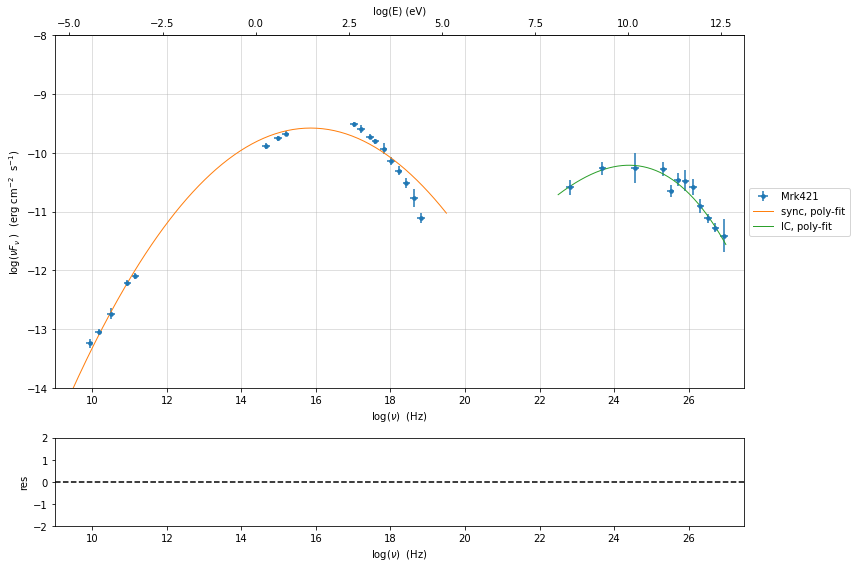

In [5]:
# Chosing best fit 1 with minuit (first line for synchrotron, second line for IC)
mm,best_fit1_minuit=my_shape.sync_fit(check_host_gal_template=False,  Ep_start=None, minimizer='minuit', silent=True, fit_range=[9,19.5], use_log_par=True)
my_shape.IC_fit(fit_range=[22.5,27],minimizer='minuit')


# Plot fit 
p=my_shape.plot_shape_fit()

# Standard rescaling
p.rescale(y_min=-14)
p.rescale(y_max=-8)
p.rescale(x_min=9)
p.rescale(x_max=27.5)

## 2.2 Prefit of the entire SED, by constraining 4 parameters with the chosen literature values (<i>Balokovic et al. 2016<i>). 

<i>The time duration of the measurement is said to be almost 12 hr, which is expressed with the time of 43200 sec. A model is built and saved as a .pkl file at the end of the prefit procedure.  <i>


***  constrains parameters from observable ***



/home/aramis/miniconda3/envs/jetset1.2/lib/python3.8/site-packages/jetset/obs_constrain.py:650: RankWarning: Polyfit may be poorly conditioned
  return func(*args, **kwargs),completed


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,1.706216e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.150673e-01,0.000000e+00,--,False,False
jet_leptonic,theta,jet-viewing-angle,deg,2.290000e+00,0.000000e+00,--,False,False
jet_leptonic,BulkFactor,jet-bulk-factor,lorentz-factor*,2.500000e+01,1.000000e+00,--,False,False
jet_leptonic,z_cosm,redshift,,3.080000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,9.835786e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,7.993519e+05,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.400726e+00,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,2.634655e+04,1.000000e+00,1.000000e+09,False,False


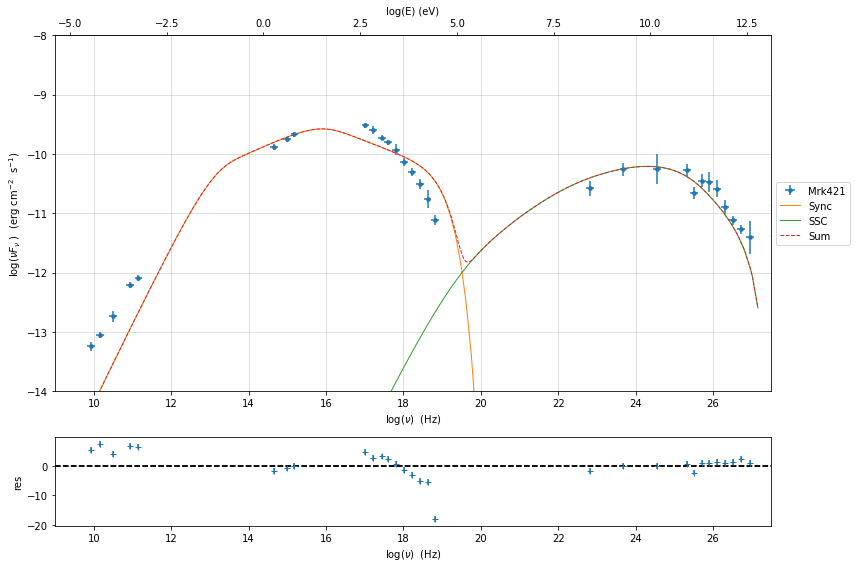

In [6]:
# Import constraining and model menager features
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet

# Constraining parameters of beaming, which is standardly fixed at 25 in Blaokovic et al., 
# fixing the max/ min range found in literature for all 4 epochs,
# 12 hr obsercation time
# nu cut at 10^{13}
sed_obspar=ObsConstrain(B_range=[0.1,0.3],
                        distr_e='bkn',
                        t_var_sec=43200,
                        nu_cut_IR=1E13,
                        bulk_factor=25,
                        theta=2.29,
                        SEDShape=my_shape)

# Creating a empty prefit with the constrained parameters (Synchrotron-self-Compton model used)
prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False, silent=True)

# Evaluating prefit
prefit_jet.eval()

# Inserting the data in a .pkl file
prefit_jet.save_model('prefit_jet_gal_templ.pkl')

# Prefit plot 
pl=prefit_jet.plot_model(sed_data=sed_data)

# Residual plot (chi)
pl.add_residual_plot(prefit_jet,sed_data)

# Standard
pl.rescale(y_min=-14,y_max=-8,x_min=9,x_max=27.5)

## 2.3 Prefit parameters table

In [7]:
prefit_jet.set_par('R',val=1.05E16)
prefit_jet.parameters.par_table
prefit_jet.save_model('prefit_jet_gal_templ.pkl')

## 2.4 Writing down prefit parameters in a new model MRK421_56392

In [8]:
from jetset.jet_model import Jet

jet_MRK421_56302=Jet.load_model('prefit_jet_gal_templ.pkl')

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,9.835786e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,7.993519e+05,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.400726e+00,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,2.634655e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,2.412170e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.500000e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R,region_size,cm,1.050000e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.150673e-01,0.000000e+00,--,False,False
jet_leptonic,theta,jet-viewing-angle,deg,2.290000e+00,0.000000e+00,--,False,False


# 3. Broadband SED fit

## 3.1 Lsb minimizer fit, with range setting according to chosen literature (<i>Balokovic et al. 2016<i>). 

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,9.835786e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,7.993519e+05,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.400726e+00,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,2.634655e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,2.412170e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.500000e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R,region_size,cm,1.050000e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,1.150673e-01,0.000000e+00,--,False,False
jet_leptonic,theta,jet-viewing-angle,deg,2.290000e+00,0.000000e+00,--,False,False


filtering data in fit range = [1.000000e+12,1.000000e+26]
data length 20

*** start fit process ***
----- 
fit run: 0


/home/aramis/miniconda3/envs/jetset1.2/lib/python3.8/site-packages/jetset/model_manager.py:147: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


0it [00:00, ?it/s]

- best chisq=9.74378e+00

fit run: 1
- old chisq=9.74378e+00


0it [00:00, ?it/s]

- best chisq=9.74378e+00

fit run: 2
- old chisq=9.74378e+00


0it [00:00, ?it/s]

- best chisq=9.74378e+00

-------------------------------------------------------------------------
Fit report

Model: SSC-best-fit-lsb


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,8.415271e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,3.685774e+05,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.953944e+00,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,5.351562e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,2.450330e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,4.350694e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R,region_size,cm,1.079732e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,2.313267e-01,0.000000e+00,--,False,False
jet_leptonic,theta,jet-viewing-angle,deg,2.290000e+00,0.000000e+00,--,False,True



converged=True
calls=18
mesg=


'The relative error between two consecutive iterates is at most 0.000000'

dof=12
chisq=9.743778, chisq/red=0.811982 null hypothesis sig=0.638427

best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
jet_leptonic,gmin,8.415271e+02,8.415271e+02,1.215025e+03,--,9.835786e+02,1.000000e+01,1.000000e+04,False
jet_leptonic,gmax,3.685774e+05,3.685774e+05,1.616146e+05,--,7.993519e+05,1.000000e+05,1.000000e+08,False
jet_leptonic,N,1.953944e+00,1.953944e+00,2.973185e+00,--,1.400726e+00,0.000000e+00,--,False
jet_leptonic,gamma_break,5.351562e+04,5.351562e+04,2.850473e+04,--,2.634655e+04,1.000000e+00,1.000000e+09,False
jet_leptonic,p,2.450330e+00,2.450330e+00,1.499675e-01,--,2.412170e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,p_1,4.350694e+00,4.350694e+00,1.977711e-01,--,3.500000e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,R,1.079732e+16,1.079732e+16,1.011557e+16,--,1.050000e+16,3.162278e+15,1.100000e+16,False
jet_leptonic,R_H,1.000000e+17,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,2.313267e-01,2.313267e-01,2.037461e-01,--,1.150673e-01,0.000000e+00,--,False
jet_leptonic,theta,2.290000e+00,--,--,--,2.290000e+00,0.000000e+00,--,True


-------------------------------------------------------------------------




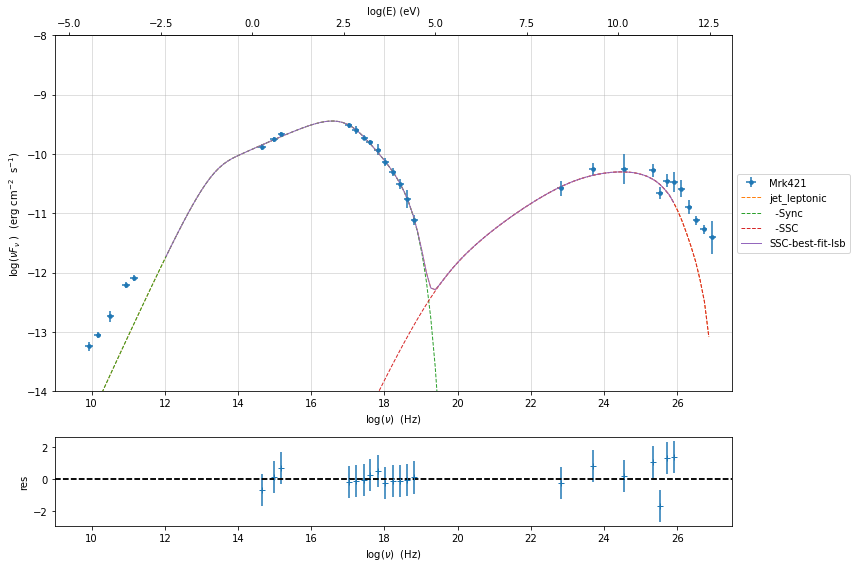

In [9]:
# Import minimizers
from jetset.minimizer import ModelMinimizer
from jetset.model_manager import  FitModel

# Loading model from prefit
jet_lsb=Jet.load_model('prefit_jet_gal_templ.pkl')

# Choosing grid size
jet_lsb.set_gamma_grid_size(200)

# Declaring the fit "fit_model_lsb" and its denomination (graph)
fit_model_lsb=FitModel(jet=jet_lsb, name='SSC-best-fit-lsb',template=None) 
# Freezing the redshift
fit_model_lsb.freeze(jet_lsb,'z_cosm')
# Freezing region position
fit_model_lsb.freeze(jet_lsb,'R_H')
# Freezing viewing angle
fit_model_lsb.freeze(jet_lsb,'theta')
# Freezing Lorentz gamma factor
fit_model_lsb.freeze(jet_lsb,'BulkFactor')

# Choosing ranges for fit from chosen literature 
fit_model_lsb.jet_leptonic.parameters.R.fit_range=[10**15.5,1.1E16]
fit_model_lsb.jet_leptonic.parameters.gmax.fit_range=[1E5,1E8]
fit_model_lsb.jet_leptonic.parameters.gmin.fit_range=[10,1E4]

fit_model_lsb.jet_leptonic.nu_size=200
fit_model_lsb.jet_leptonic.IC_nu_size=100
fit_model_lsb.jet_leptonic._blob.adaptive_e_binning=0

# Model minimizer choosen lsb
model_minimizer_lsb=ModelMinimizer('lsb')

# Selecting best fit among the repetitions and creating the corresponding model
best_fit_lsb=model_minimizer_lsb.fit(fit_model_lsb,sed_data,10**12,1E26,fitname='SSC-best-fit-lsb',repeat=3)

# Plotting the fit along with the Mrk421 data
%matplotlib inline
fit_model_lsb.set_nu_grid(1E6,1E30,200)

# Evaluating the final model
fit_model_lsb.eval()
p2=fit_model_lsb.plot_model(sed_data=sed_data)

# Standard rescaling
p2.rescale(y_min=-14,y_max=-8,x_min=9,x_max=27.5)

## 3.2 Lsb-fit parameters table

In [10]:
jet_lsb.parameters.par_table

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str12,str11,str19,object,float64,float64,float64,bool,bool
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,8.415271e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,3.685774e+05,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.953944e+00,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,5.351562e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,2.450330e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,4.350694e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R,region_size,cm,1.079732e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,2.313267e-01,0.000000e+00,--,False,False


## 3.3 Modifying lsb fit with a minuit fit

filtering data in fit range = [1.000000e+12,1.000000e+26]
data length 20

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=9.74374e+00

fit run: 1
- old chisq=9.74374e+00


0it [00:00, ?it/s]

- best chisq=9.74341e+00

fit run: 2
- old chisq=9.74341e+00


0it [00:00, ?it/s]

- best chisq=9.74340e+00

-------------------------------------------------------------------------
Fit report

Model: SSC-best-fit-minuit


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,8.452697e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,3.686389e+05,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.948711e+00,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,5.363331e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,2.451533e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,4.352454e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R,region_size,cm,1.078966e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,2.313437e-01,0.000000e+00,--,False,False
jet_leptonic,theta,jet-viewing-angle,deg,2.290000e+00,0.000000e+00,--,False,True



converged=True
calls=120
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.743                      │              Nfcn = 120              │
│ EDM = 6.78e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │  0.85e3   │  0.12e3   │            │            │   10    │  10000  │       │
│ 1 │ par_1 │  368.6e3  │   2.0e3   │            │            │ 100000  │  1e+08  │       │
│ 2 │ par_2 │    1.9    │    0.8    │            │            │    0    │         │       │
│ 3 │ par_3 │   54e3    │    9e3    │            │            │    1    │  1e+09  │       │
│ 4 │ par_4 │   2.45    │   0.12    │            │            │   -10   │   10    │       │
│ 5 │ par_5 │   4.35    │   0.14    │            │            │   -10   │   10    │       │
│ 6 │ par_6 │  10.8e15  │  1.1e15   │            │            │3.16228e+15│ 1.1e+16 │       │
│ 7 │ par_7 │  0.2313   │  0.0028   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4     par_5     par_6     par_7 │
├───────┼─────────────────────────────────────────────────────────────────────────────────┤
│ par_0 │  1.42e+04  6.81e+03     -36.2  9.81e+04      1.44     0.522  -1.2e+16   -0.0128 │
│ par_1 │  6.81e+03  3.87e+06    -0.243  6.23e+05      4.63      17.5 -1.66e+16   -0.0212 │
│ par_2 │     -36.2    -0.243     0.682  5.38e+03    0.0766    0.0321 -6.34e+14   0.00014 │
│ par_3 │  9.81e+04  6.23e+05  5.38e+03  8.84e+07  1.03e+03       898 -5.16e+18    -0.255 │
│ par_4 │      1.44      4.63    0.0766  1.03e+03    0.0147   0.00724 -6.68e+13  2.06e-06 │
│ par_5 │     0.522      17.5    0.0321       898   0.00724    0.0183 -2.52e+13  2.71e-05 │
│ par_6 │  -1.2e+16 -1.66e+16 -6.34e+14 -5.16e+18 -6.68e+13 -2.52e+13  9.79e+29 -3.89e+11 │
│ par_7 │   -0.0128   -0.0212   0.00014    -0.255  2.06e-06  2.71e-05 -3.89e+11  8.03e-06 │
└───────┴─────────────────────────────────────────────────────────────────────────────────┘

dof=12
chisq=9.743399, chisq/red=0.811950 null hypothesis sig=0.638461

best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
jet_leptonic,gmin,8.452697e+02,8.452697e+02,1.189679e+02,--,8.415271e+02,1.000000e+01,1.000000e+04,False
jet_leptonic,gmax,3.686389e+05,3.686389e+05,1.966591e+03,--,3.685774e+05,1.000000e+05,1.000000e+08,False
jet_leptonic,N,1.948711e+00,1.948711e+00,8.213440e-01,--,1.953944e+00,0.000000e+00,--,False
jet_leptonic,gamma_break,5.363331e+04,5.363331e+04,9.403013e+03,--,5.351562e+04,1.000000e+00,1.000000e+09,False
jet_leptonic,p,2.451533e+00,2.451533e+00,1.211517e-01,--,2.450330e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,p_1,4.352454e+00,4.352454e+00,1.351289e-01,--,4.350694e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,R,1.078966e+16,1.078966e+16,1.075323e+15,--,1.079732e+16,3.162278e+15,1.100000e+16,False
jet_leptonic,R_H,1.000000e+17,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,2.313437e-01,2.313437e-01,2.833221e-03,--,2.313267e-01,0.000000e+00,--,False
jet_leptonic,theta,2.290000e+00,--,--,--,2.290000e+00,0.000000e+00,--,True


-------------------------------------------------------------------------




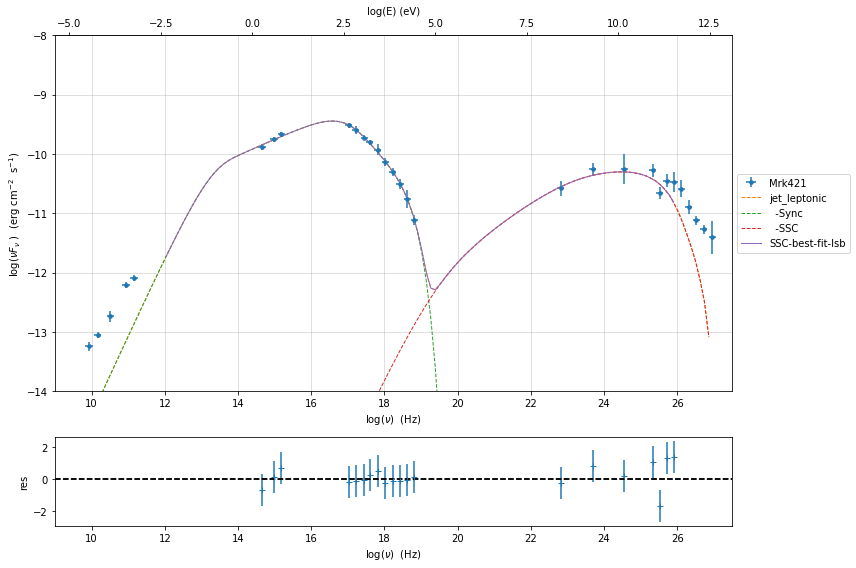

In [11]:
# Defining model minimizer
model_minimizer_minuit=ModelMinimizer('minuit')

# Defining best fit lsb --> minuit
best_fit_minuit=model_minimizer_minuit.fit(fit_model_lsb,sed_data,10**12,1E26,fitname='SSC-best-fit-minuit',repeat=3)

# Plotting fit (here "fit_model_lsb" corresponds to the fitted model modified by minuit minimizer)
%matplotlib inline
fit_model_lsb.set_nu_grid(1E6,1E30,200)

# Evaluating fit
fit_model_lsb.eval()
p2=fit_model_lsb.plot_model(sed_data=sed_data)

# Standard rescaling
p2.rescale(y_min=-14,y_max=-8,x_min=9,x_max=27.5)

## 3.4 Minuit-fit parameters table

In [12]:
best_fit_minuit.parameters.par_table

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str12,str11,str19,object,float64,float64,float64,bool,bool
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,8.452697e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,3.686389e+05,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.948711e+00,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,5.363331e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,2.451533e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,4.352454e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R,region_size,cm,1.078966e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,2.313437e-01,0.000000e+00,--,False,False


# 4. Furhter analysis from the fit

## 4.1 Energetic report

In [13]:
fit_model_lsb.jet_leptonic.energetic_report()

name,type,units,val
U_e,Energy dens. blob rest. frame,erg / cm3,3.798159e-03
U_p_cold,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_B,Energy dens. blob rest. frame,erg / cm3,2.129489e-03
U_p,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_p_target,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_Synch,Energy dens. blob rest. frame,erg / cm3,9.457466e-04
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,3.710094e+02
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_DT,Energy dens. blob rest. frame,erg / cm3,0.000000e+00


## 4.2 Montecarlo Markov Chain run


In [14]:
from jetset.mcmc import McmcSampler
mcmc=McmcSampler(model_minimizer_lsb)
# No beaming because it is imposed in the fit
labels=['B','R','p','p_1','gamma_break','gmin','gmax']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}
mcmc.run_sampler(nwalkers=128,burnin=10,steps=50,bound=5.0,bound_rel=True,threads=None,walker_start_bound=0.005,use_labels_dict=use_labels_dict)

mcmc run starting



  0%|          | 0/50 [00:00<?, ?it/s]

mcmc run done, with 1 threads took 664.87 seconds


## Corner plots between parameters g0,s,B and N,B,s

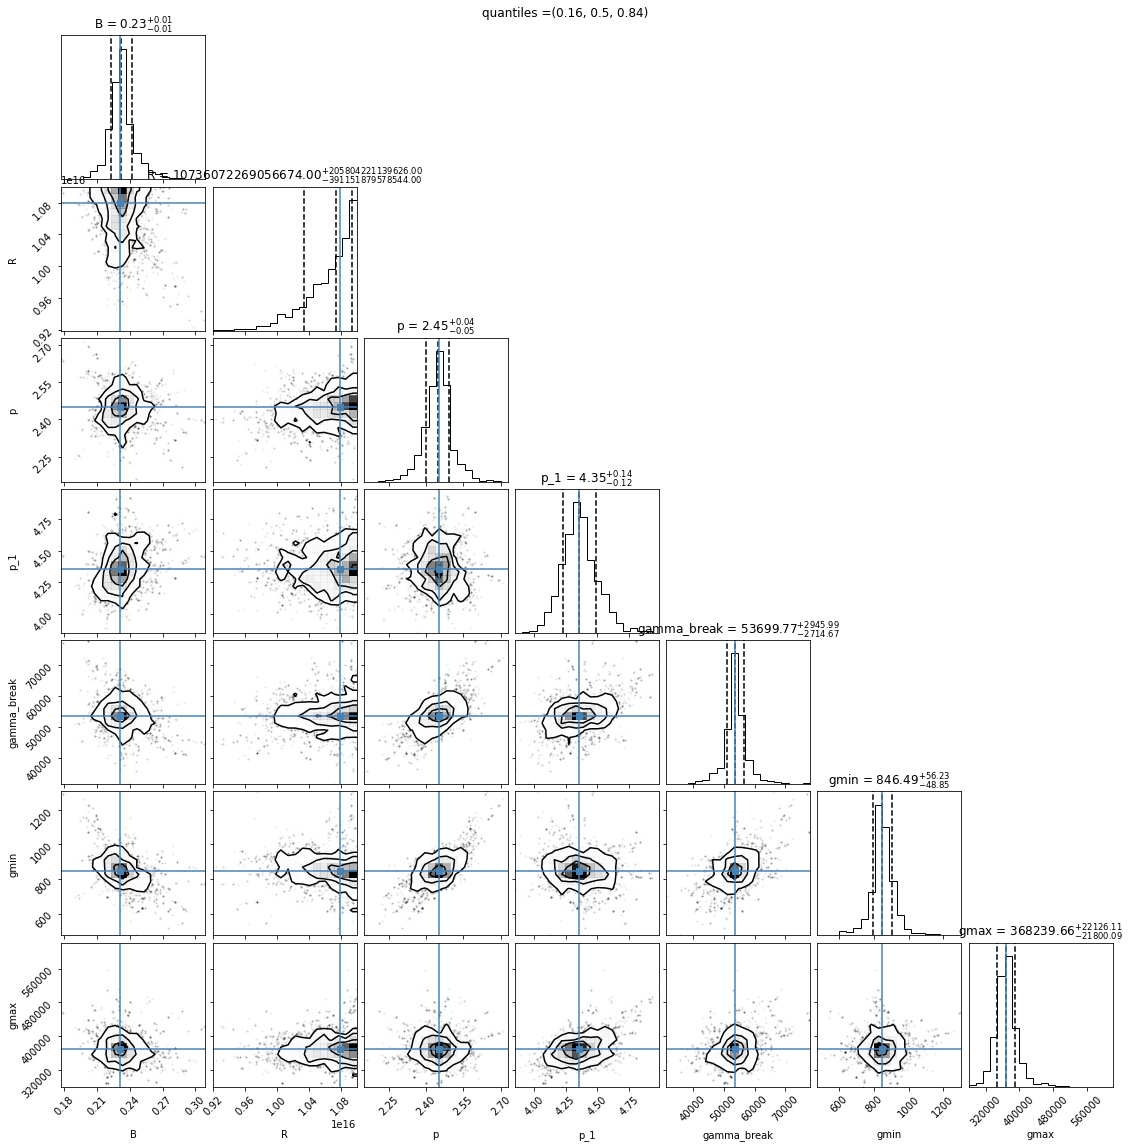

In [15]:
f=mcmc.corner_plot()

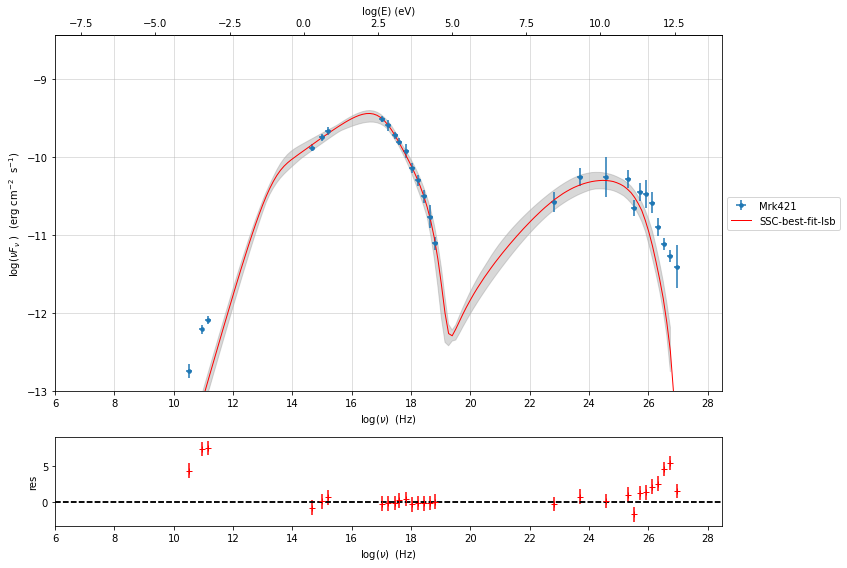

In [16]:
p=mcmc.plot_model(sed_data=sed_data,fit_range=[10.5,27.4],size=50)
p.rescale(y_min=-13,x_min=6,x_max=28.5)